# **Desafio Técnico - Análise Exploratória dos Dados**

Americanas - Cientista de Dados Júnior | BEE

Candidato: Rafael Pavan

Linkedin: https://www.linkedin.com/in/engrafaelpavan/

# **1. Carregamento dos Dados** 

- 16 Features não identificadas;
- 1 Target binária (0 - Não ocorrência, 1 - Ocorrência);
- Problema de classificação (aprendizado supervisionado);
- 466 observações.

Fonte: https://drive.google.com/file/d/1HXq9mczY-5OpFaXK3kk8zAgFEgEgF3jt/view?usp=sharing

In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.simplefilter("ignore")

dir = os.getcwd()

dados = pd.read_parquet(f"{dir}/dados_brutos/dataset_cdjr.parquet.gzip", engine='pyarrow')

dados.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
337,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850,0.009198,94.611429,7,0
266,150.0,2,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000,0.000000,0.000000,0,1
236,50.0,1,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525,0.095238,86.520000,4,0
274,100.0,2,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000,0.000000,0.000000,0,1
208,50.0,1,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500,0.004367,87.560000,1,0


# **2. Análise Exploratória**

### **2.1. Valores Missing/Faltantes** 

In [2]:
dados.isnull().sum()

feature0     0
feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
target       0
dtype: int64

In [3]:
dados.isna().sum()

feature0     0
feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
target       0
dtype: int64

Podemos observar que não há valores faltantes/missing.

### **2.2. Tipos de Variáveis - Contínuas / Inteiras**

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 337 to 92
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature0   466 non-null    float64
 1   feature1   466 non-null    int64  
 2   feature2   466 non-null    float64
 3   feature3   466 non-null    float64
 4   feature4   466 non-null    float64
 5   feature5   466 non-null    float64
 6   feature6   466 non-null    int64  
 7   feature7   466 non-null    float64
 8   feature8   466 non-null    float64
 9   feature9   466 non-null    int64  
 10  feature10  466 non-null    float64
 11  feature11  466 non-null    float64
 12  feature12  466 non-null    float64
 13  feature13  466 non-null    float64
 14  feature14  466 non-null    float64
 15  feature15  466 non-null    int64  
 16  target     466 non-null    int64  
dtypes: float64(12), int64(5)
memory usage: 65.5 KB


In [5]:
target = dados.target.copy()

dados.describe()


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,4.660000e+02,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,438.743562,4.847639,1244.322468,44.600880,-434.299893,0.473991,979.070815,0.113885,3.857010,2.164378e+05,6930.456438,0.437333,61.886190,0.008634,87.713360,10.313305,0.557940
std,984.593065,6.836679,3558.699033,122.093515,975.555198,0.452261,1460.738442,1.873746,15.609132,3.508622e+05,17581.800818,3.442094,142.521523,0.017866,145.426437,33.625204,0.497165
min,0.000000,0.000000,0.000000,-645.870000,-15506.350000,0.150000,1.000000,0.000663,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,1.000000,0.000000,-0.400000,-492.035000,0.173669,133.500000,0.003318,0.000000,2.113100e+04,383.687500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150.000000,2.000000,169.830000,18.360000,-154.525000,0.303854,420.000000,0.005127,0.937082,8.532850e+04,1410.855000,0.082515,19.692568,0.003207,72.524286,2.000000,1.000000
75%,500.000000,6.000000,1017.375000,44.630000,-50.180000,0.569848,1238.750000,0.009699,2.815824,2.645035e+05,5212.977500,0.311311,65.498098,0.009515,127.301505,8.000000,1.000000
max,15400.000000,31.000000,40291.240000,1521.900000,-0.260000,3.150000,11731.000000,40.000000,281.666667,3.366472e+06,237182.780000,73.080634,2232.100000,0.204611,2154.000000,541.000000,1.000000


Podemos observar que os dados possuem dois tipos de variáveis: inteiras/discretas (int64) e contínuas (float64).

In [6]:
integer_columns = dados.select_dtypes(np.int64).columns.to_list()

integer_columns.remove('target')

print('Inteiras: ', integer_columns)

float_columns = dados.select_dtypes(np.float64).columns.to_list()

print('Continuas: ', float_columns)

Inteiras:  ['feature1', 'feature6', 'feature9', 'feature15']
Continuas:  ['feature0', 'feature2', 'feature3', 'feature4', 'feature5', 'feature7', 'feature8', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14']


Variáveis Inteiras:

array([[<AxesSubplot:title={'center':'feature1'}>,
        <AxesSubplot:title={'center':'feature6'}>],
       [<AxesSubplot:title={'center':'feature9'}>,
        <AxesSubplot:title={'center':'feature15'}>]], dtype=object)

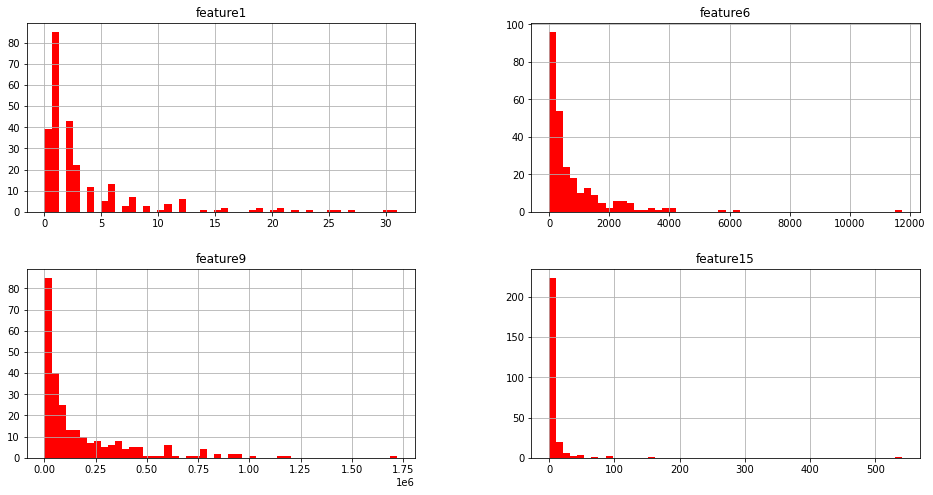

In [7]:
dados[integer_columns][dados['target']==1].hist(bins=50, figsize=(16,8), color='red')

array([[<AxesSubplot:title={'center':'feature1'}>,
        <AxesSubplot:title={'center':'feature6'}>],
       [<AxesSubplot:title={'center':'feature9'}>,
        <AxesSubplot:title={'center':'feature15'}>]], dtype=object)

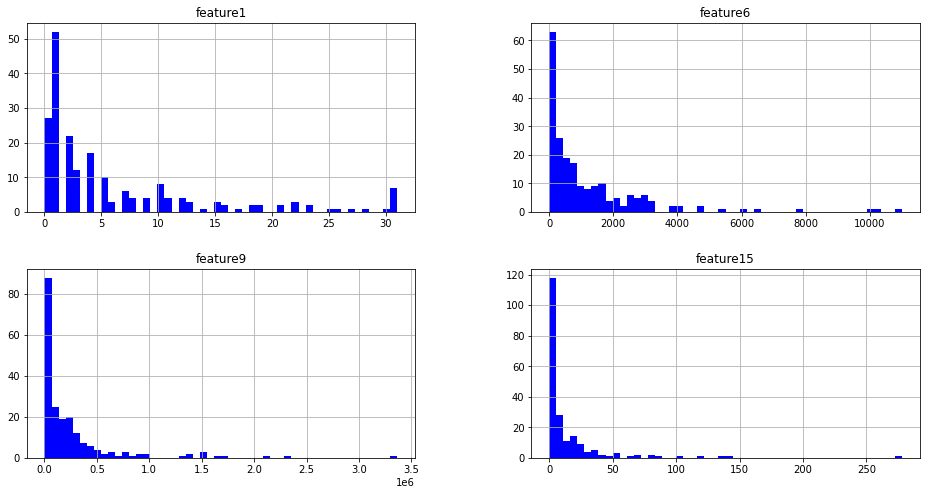

In [8]:
dados[integer_columns][dados['target']==0].hist(bins=50, figsize=(16,8), color='blue')

Text(0.5, 1.0, 'Histograma - Target')

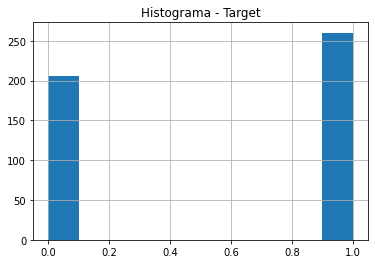

In [9]:
dados['target'].hist()
plt.title('Histograma - Target')

Variáveis Contínuas:

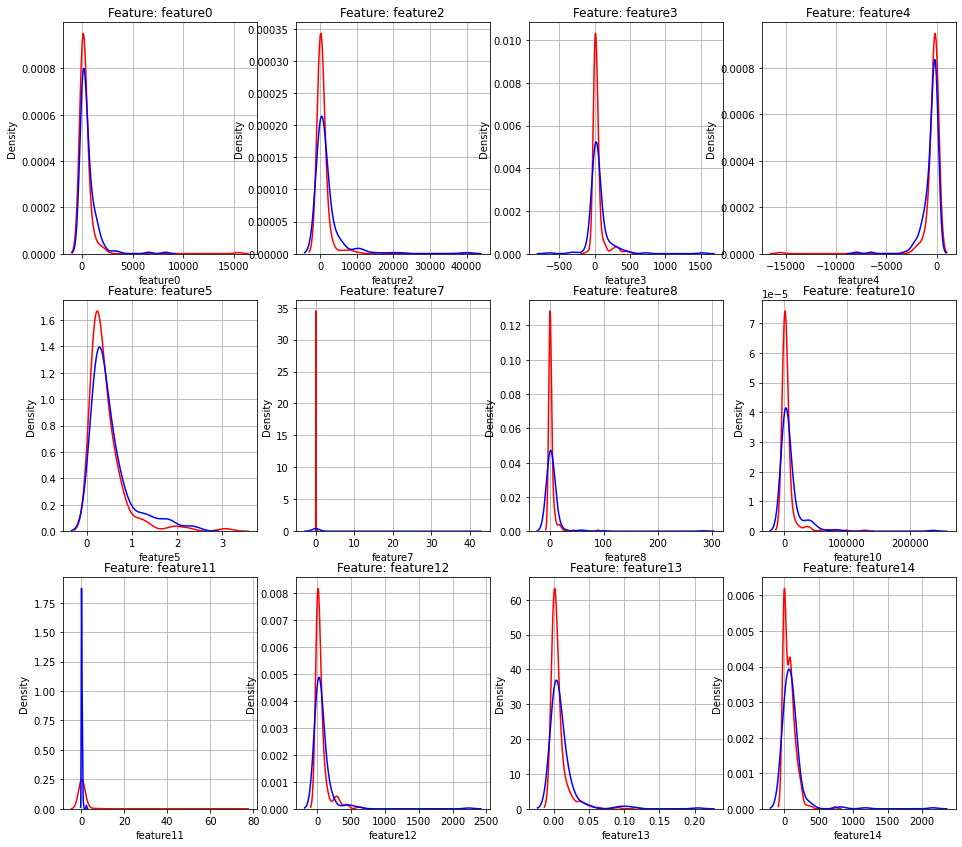

In [10]:
def kde_plot(dados, feature):

    sns.kdeplot(dados[feature][dados['target']==1], label='1', color='red')
    sns.kdeplot(dados[feature][dados['target']==0], label='0', color='blue')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Feature: {feature}')
    plt.grid()

fig = plt.figure(figsize=(16,40))

i=0
for coluna in float_columns:
    plt.subplot(8,4,i+1)
    kde_plot(dados, coluna) 
    i=i+1

- **Podemos observar que as features não possuem uma distribuição normal, ou seja, possuem um determinado grau de assimetria. Sabe-se que, no geral, modelos de machine learning tendem a performar melhor quando a distribuição dos dados é normal. Logo, visando melhor tais distribuições, vamos aplicar o método de Yeo-Johnson do PowerTransformer**

- **Algumas das variáveis contínuas apresentam outliers. Como não sabemos o que cada feature representa, vamos averiguar se tais outliers apresentam alguma relação com a target. Na vida real, outliers podem também ser erros de medida ou digitação. No entanto, por não sabermos o que significa cada variável, não podemos tirar conclusões a respeito disso.**

- **A variável target apresenta uma distribuição balanceada das classes 0 e 1**


### **2.3. Outliers**

Vamos verificar os outliers do conjunto de dados e tentar analisar se apresentam alguma relação com a variável target.

In [11]:
def identifica_outliers(df_in, col_name):

    q1 = df_in[col_name].quantile(0.25)

    q3 = df_in[col_name].quantile(0.75)
    
    iqr = q3-q1 # amplitude interquartil
    
    low  = q1-1.5*iqr
    
    high = q3+1.5*iqr
    
    df_out = df_in.loc[(df_in[col_name] < low) | (df_in[col_name] > high)]

    df_norm = df_in.loc[(df_in[col_name] > low) & (df_in[col_name] < high)]

    total1out = len(df_out[df_out['target']==1])

    total0out = len(df_out[df_out['target']==0])

    totalout = len(df_out)

    if totalout ==0:

        print(f'Coluna {col_name} tem {totalout} outliers')

    else:
            
        total1norm = len(df_norm[df_norm['target']==1])

        total0norm = len(df_norm[df_norm['target']==0])

        totalnorm = len(df_norm)

        print(f'Coluna {col_name} tem {totalout} outliers, sendo {np.round(100*total1out/totalout,3)}% da clase 1 e, {np.round(100*total0out/totalout,3)}% da classe 0.')

        print(f'Coluna {col_name} tem {totalnorm} observações dentro da IQR, sendo {np.round(100*total1norm/totalnorm,3)}% da clase 1 e, {np.round(100*total0norm/totalnorm,3)}% da classe 0.')

    print('--------------------')



def histograma_outliers(df_in, col_name):

    q1 = df_in[col_name].quantile(0.25)

    q3 = df_in[col_name].quantile(0.75)
    
    iqr = q3-q1 # amplitude interquartil
    
    low  = q1-1.5*iqr
    
    high = q3+1.5*iqr
    
    df_out = df_in.loc[(df_in[col_name] < low) | (df_in[col_name] > high)]

    return df_out



def histograma_no_outliers(df_in, col_name):

    q1 = df_in[col_name].quantile(0.25)

    q3 = df_in[col_name].quantile(0.75)
    
    iqr = q3-q1 # amplitude interquartil
    
    low  = q1-1.5*iqr
    
    high = q3+1.5*iqr
    
    df_out = df_in.loc[(df_in[col_name] > low) & (df_in[col_name] < high)]

    return df_out


In [12]:
for coluna in dados.columns[0:-1]:
    
    identifica_outliers(dados.copy(), coluna)

Coluna feature0 tem 44 outliers, sendo 31.818% da clase 1 e, 68.182% da classe 0.
Coluna feature0 tem 422 observações dentro da IQR, sendo 58.294% da clase 1 e, 41.706% da classe 0.
--------------------
Coluna feature1 tem 47 outliers, sendo 36.17% da clase 1 e, 63.83% da classe 0.
Coluna feature1 tem 419 observações dentro da IQR, sendo 57.995% da clase 1 e, 42.005% da classe 0.
--------------------
Coluna feature2 tem 54 outliers, sendo 29.63% da clase 1 e, 70.37% da classe 0.
Coluna feature2 tem 412 observações dentro da IQR, sendo 59.223% da clase 1 e, 40.777% da classe 0.
--------------------
Coluna feature3 tem 62 outliers, sendo 38.71% da clase 1 e, 61.29% da classe 0.
Coluna feature3 tem 404 observações dentro da IQR, sendo 58.416% da clase 1 e, 41.584% da classe 0.
--------------------
Coluna feature4 tem 43 outliers, sendo 34.884% da clase 1 e, 65.116% da classe 0.
Coluna feature4 tem 423 observações dentro da IQR, sendo 57.92% da clase 1 e, 42.08% da classe 0.
--------------

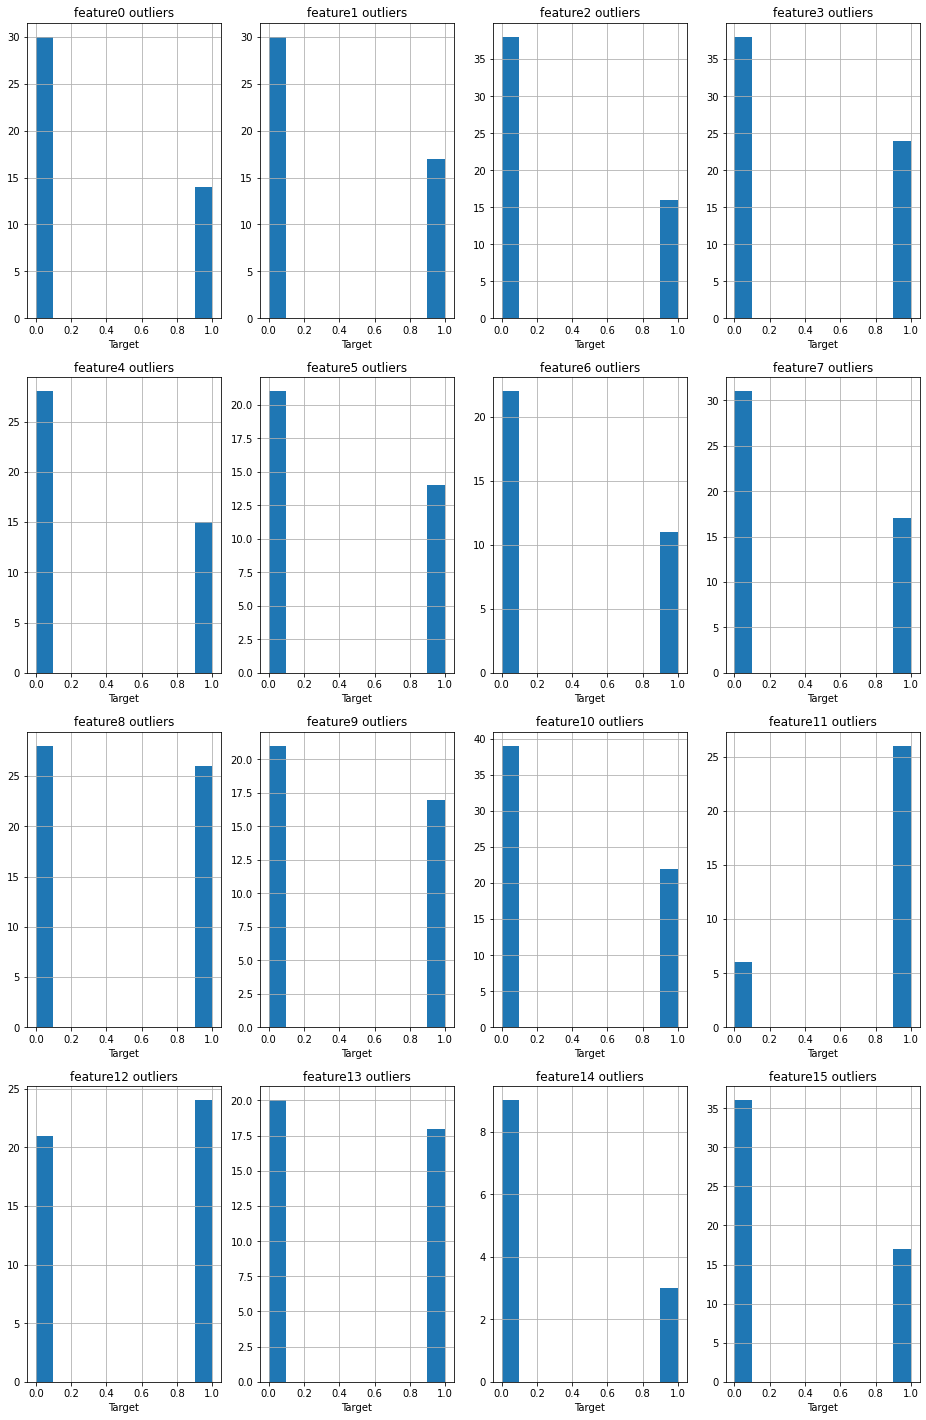

In [13]:
plt.figure(figsize=(16,25))

# Verificar distribuição da target para os dados com outliers

for i in range(0,len(dados.columns)-1):
    
    plt.subplot(4,4,i+1)

    outliers = histograma_outliers(dados, dados.columns[i])

    outliers['target'].hist()

    plt.xlabel('Target')

    plt.title(dados.columns[i] + ' outliers')

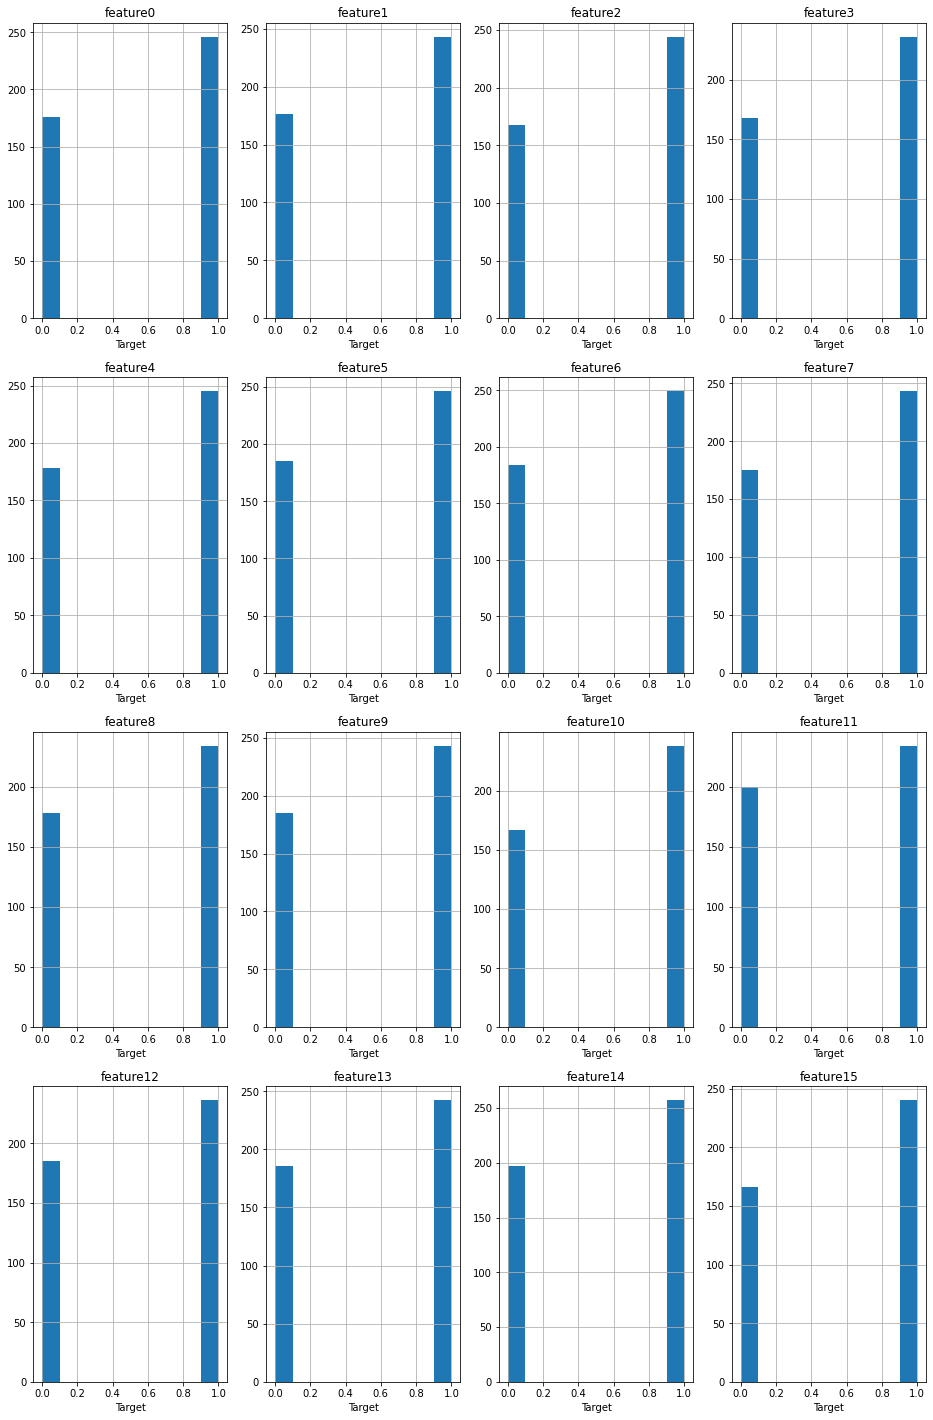

In [14]:
plt.figure(figsize=(16,25))

# Verificar distribuição da target para os dados sem outliers

for i in range(0,len(dados.columns)-1):
    
    plt.subplot(4,4,i+1)

    outliers = histograma_no_outliers(dados, dados.columns[i])

    outliers['target'].hist()

    plt.xlabel('Target')

    plt.title(dados.columns[i])

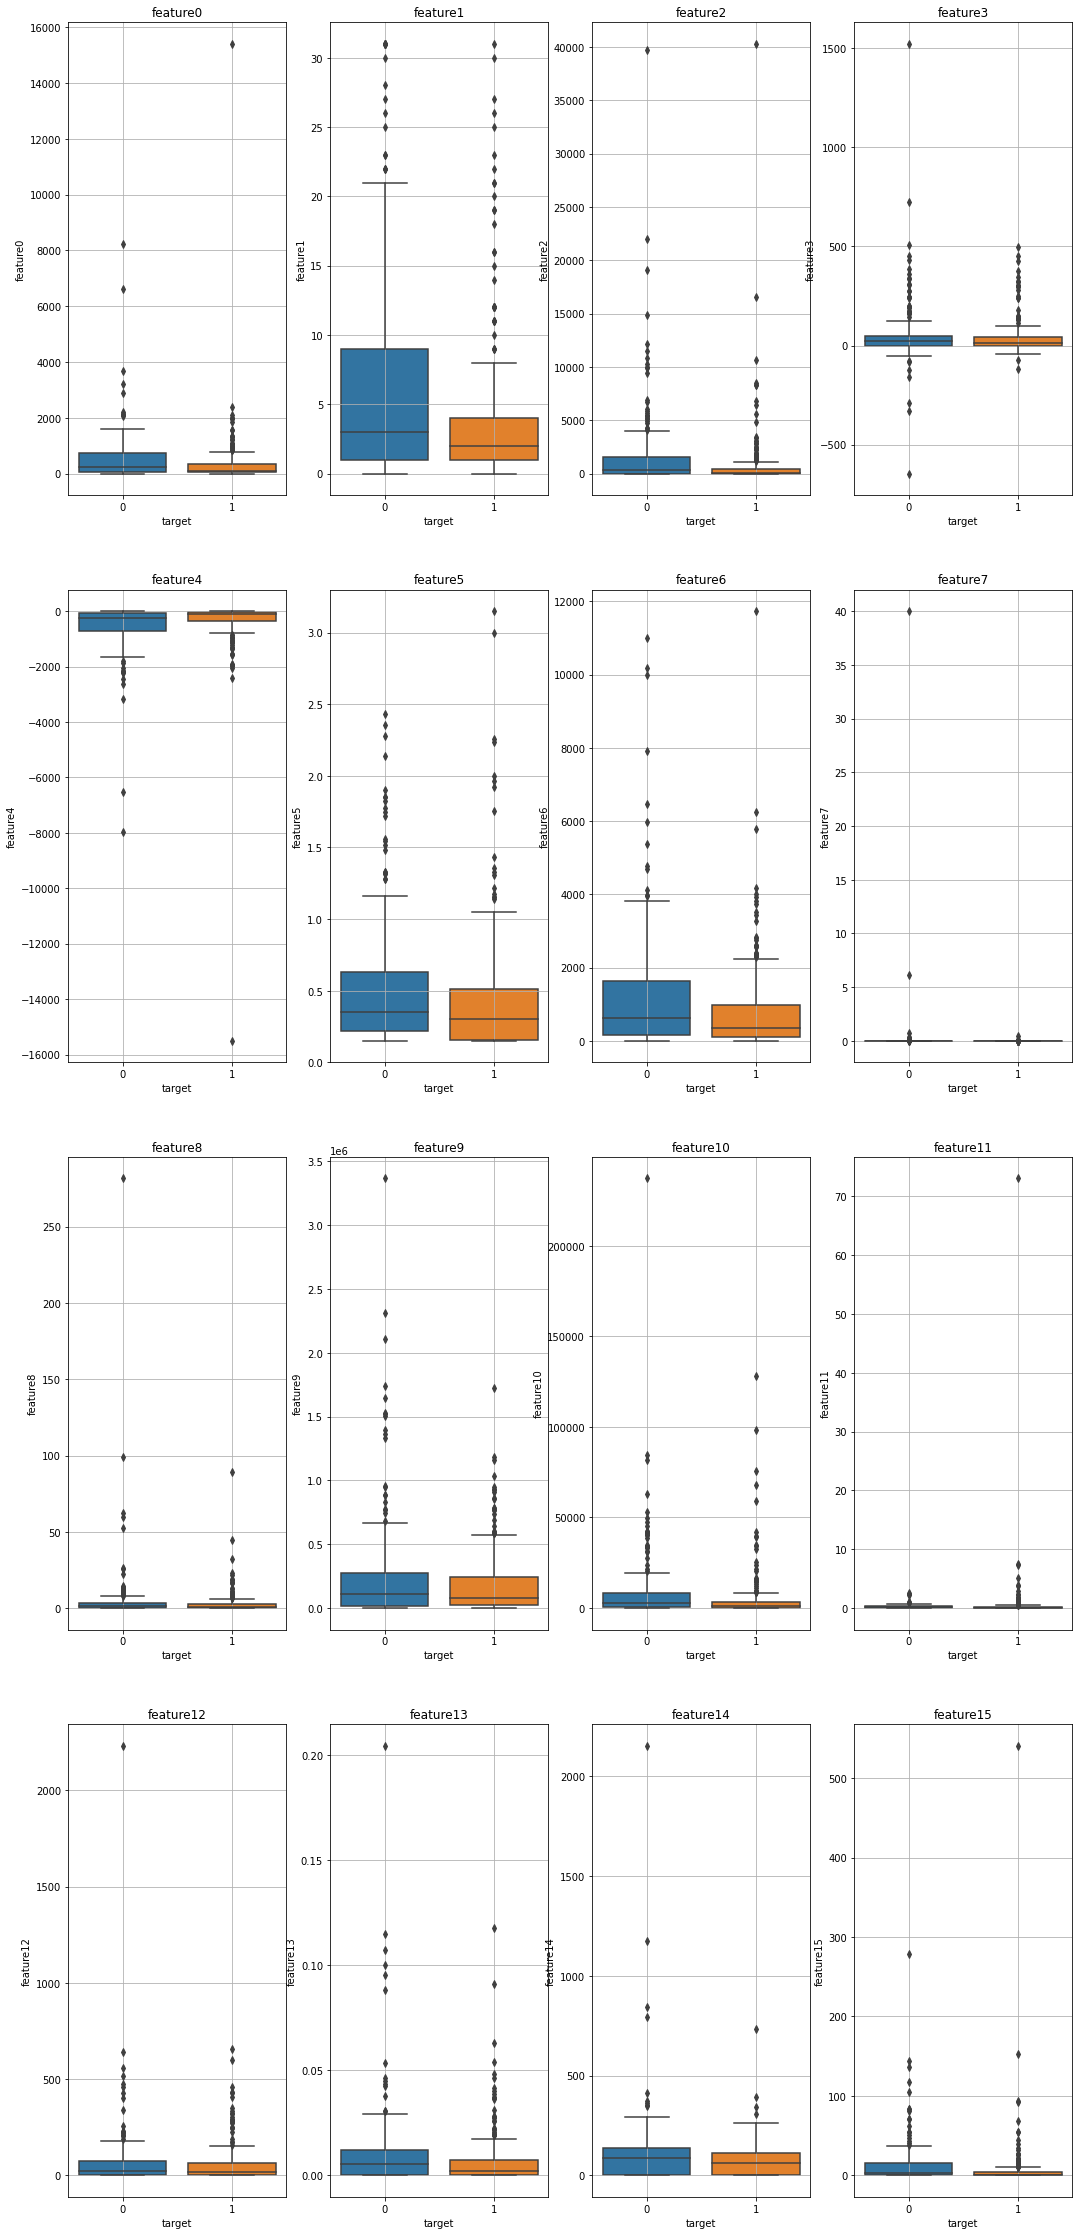

In [15]:
def box_plot_por_target(dados, feature):

    sns.boxplot(x='target',y=feature,data=dados)

    plt.title(feature)
    
    plt.grid()
    
fig = plt.figure(figsize=(18,40))

for i in range(0,len(dados.columns)-1):
    
    plt.subplot(4,4,i+1)

    box_plot_por_target(dados, dados.columns[i])

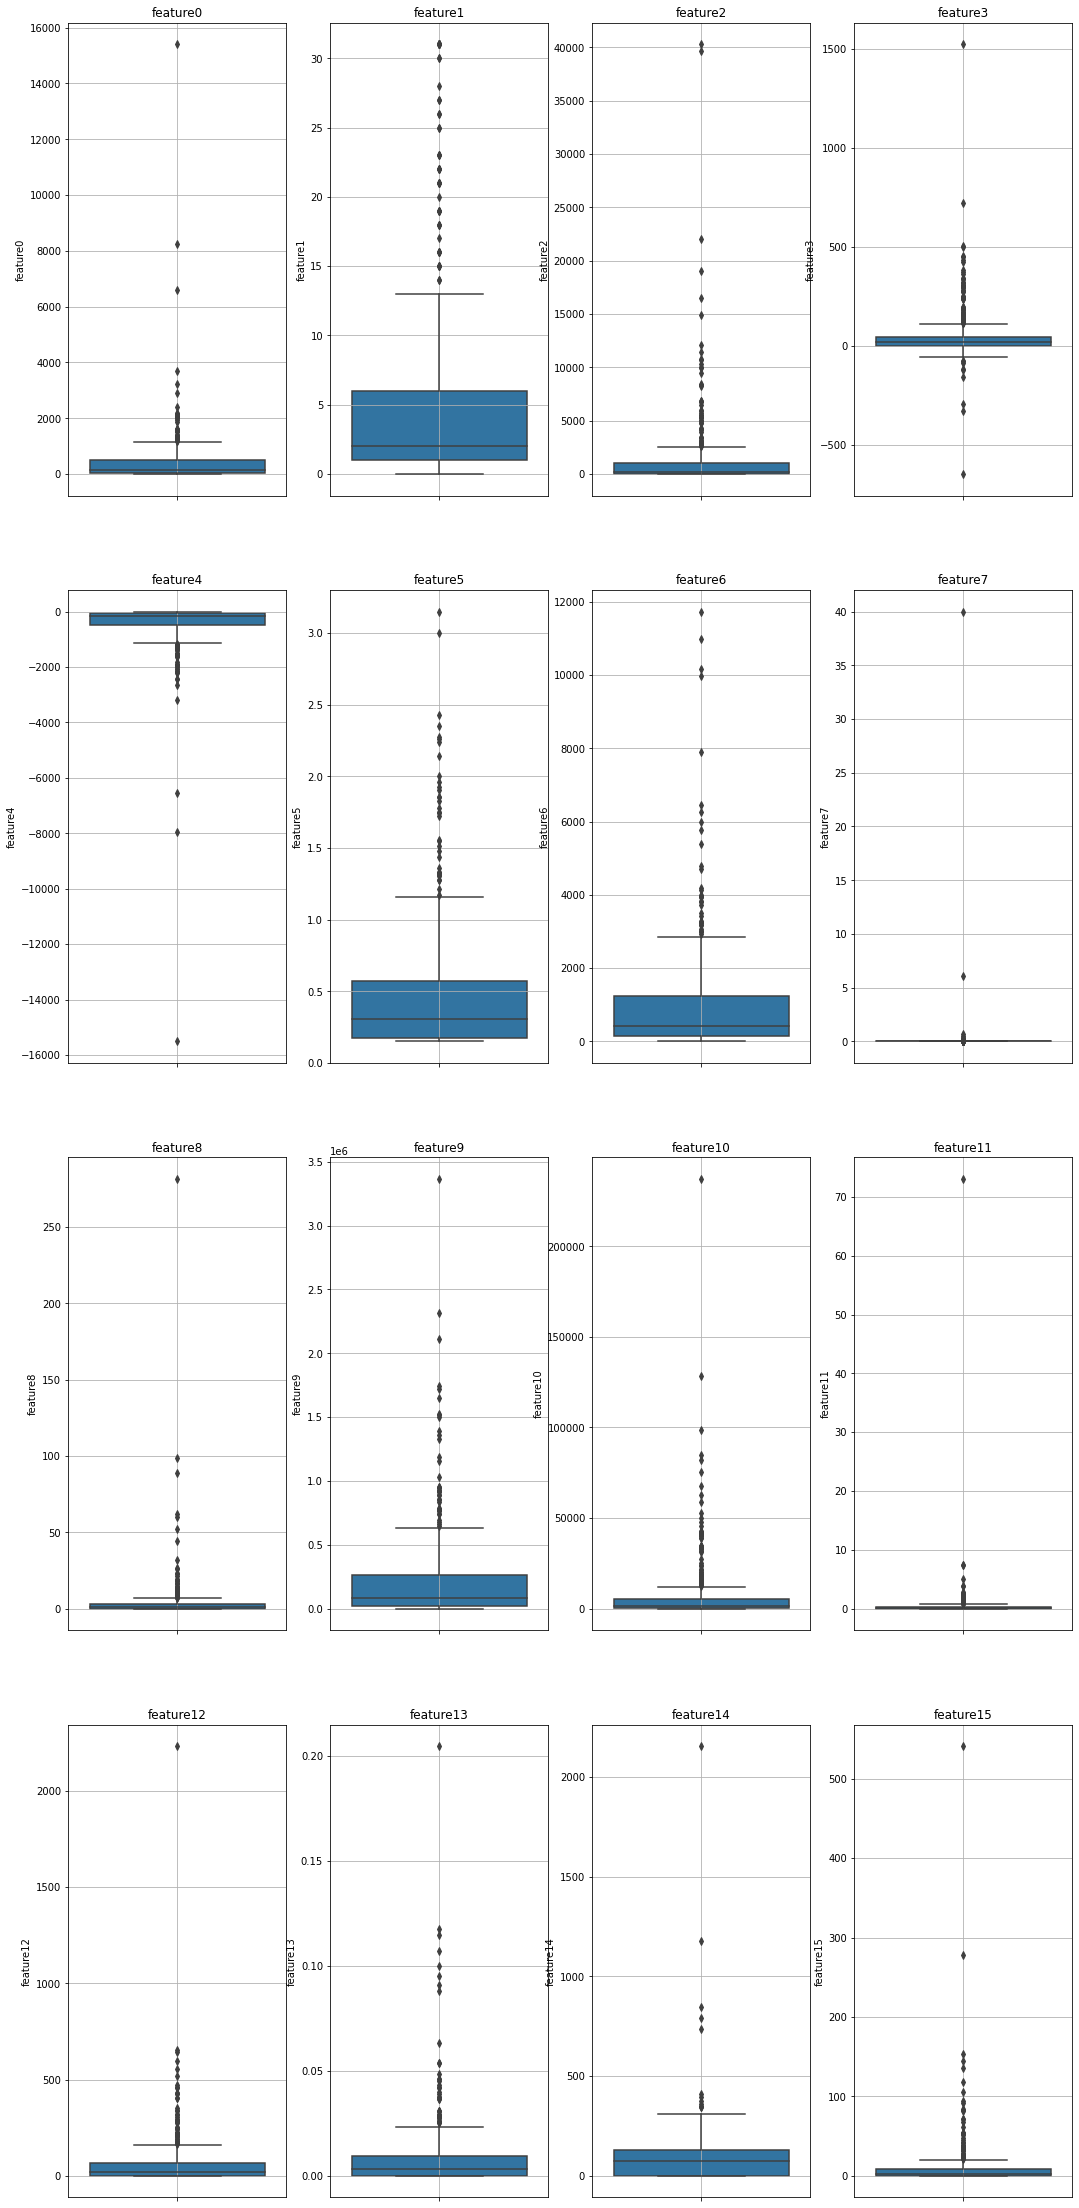

In [16]:
def box_plot_total(dados, feature):

    sns.boxplot(y=feature,data=dados)

    plt.title(feature)
    
    plt.grid()
    
    
fig = plt.figure(figsize=(18,40))

for i in range(0,len(dados.columns)-1):
    
    plt.subplot(4,4,i+1)

    box_plot_total(dados, dados.columns[i])

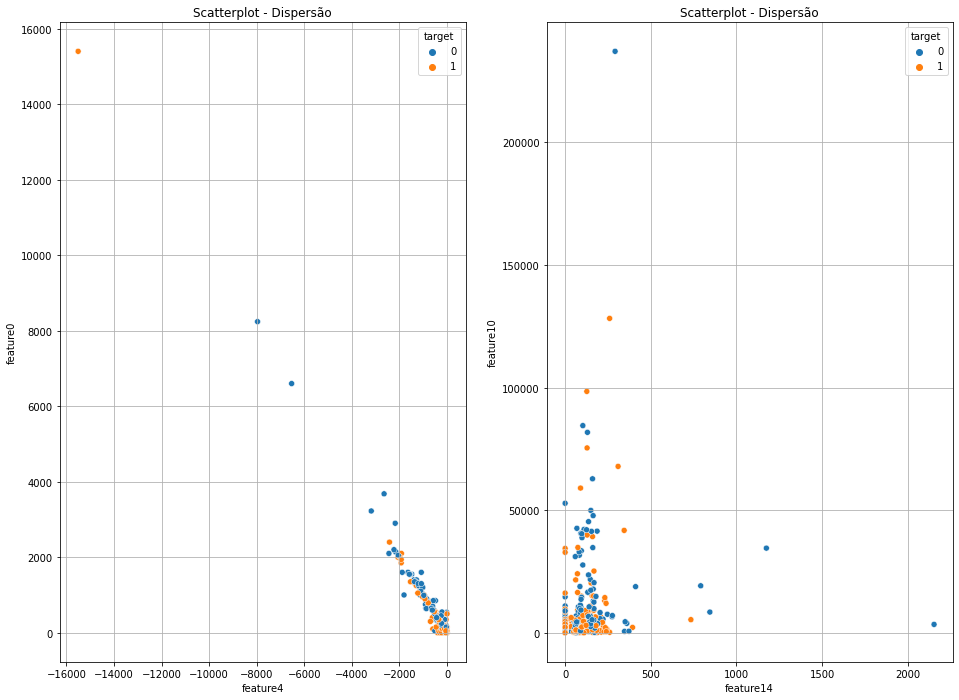

In [17]:
def scatter1(dados, feature1, feature2):

    sns.scatterplot(data=dados, x=feature1, y=feature2, hue='target')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Scatterplot - Dispersão')
    plt.grid()

plt.figure(figsize=(16,40))

plt.subplot(3,2,1)
scatter1(dados,'feature4', 'feature0')

plt.subplot(3,2,2)
scatter1(dados,'feature14', 'feature10')


Conforme visto acima, os outliers prejudicam a visualização dos dados. Vamos tentar retirar os extremos (>0.99% e <0.01% percentil):

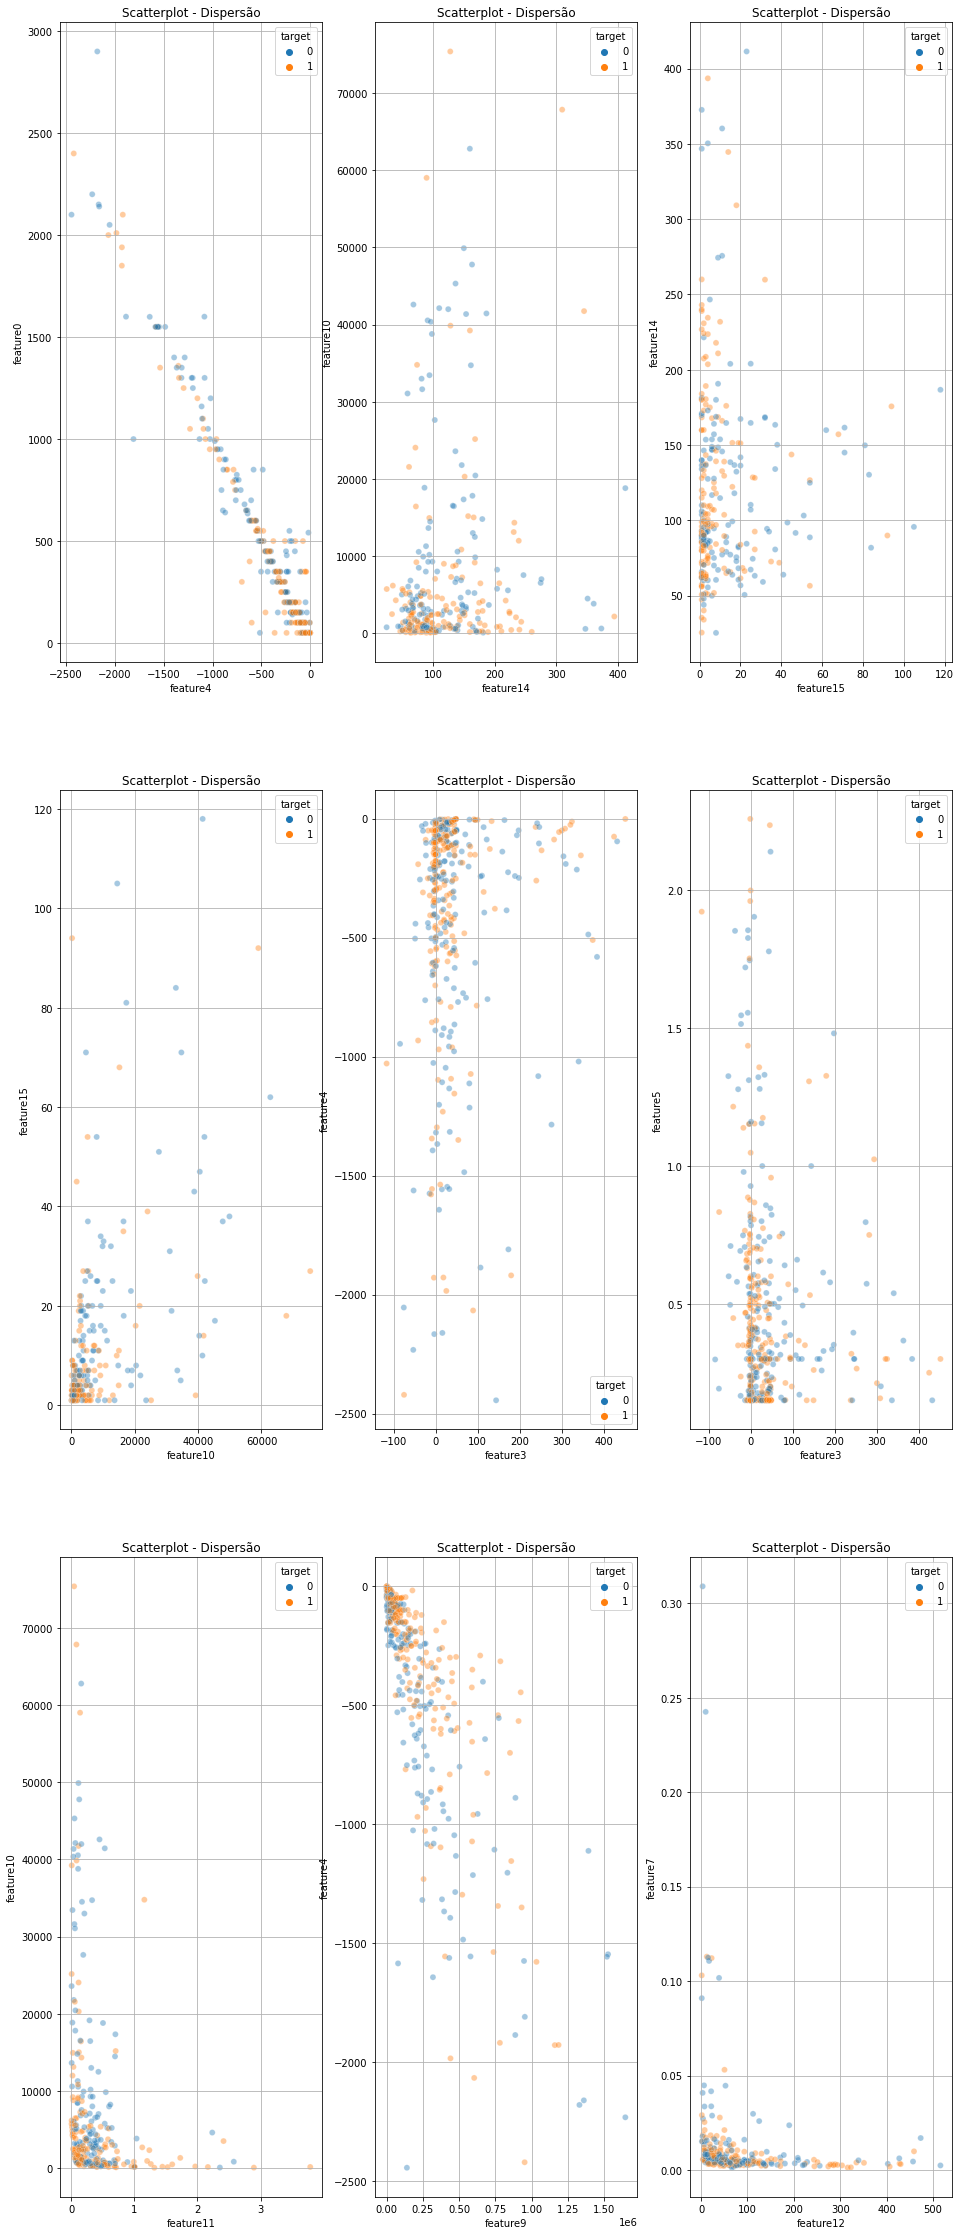

In [18]:
def scatter2(dados, feature1, feature2):

    dados2 = dados[(dados[feature1]<dados[feature1].quantile(0.99)) & (dados[feature2]<dados[feature2].quantile(0.99)) & (dados[feature1]>dados[feature1].quantile(0.01)) & (dados[feature2]>dados[feature2].quantile(0.01))]

    sns.scatterplot(data=dados2, x=feature1, y=feature2, hue='target', alpha=0.4)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Scatterplot - Dispersão')
    plt.grid()

plt.figure(figsize=(16,40))

plt.subplot(3,3,1)
scatter2(dados,'feature4', 'feature0')

plt.subplot(3,3,2)
scatter2(dados,'feature14', 'feature10')

plt.subplot(3,3,3)
scatter2(dados,'feature15', 'feature14')

plt.subplot(3,3,4)
scatter2(dados,'feature10', 'feature15')

plt.subplot(3,3,5)
scatter2(dados,'feature3', 'feature4')

plt.subplot(3,3,6)
scatter2(dados,'feature3', 'feature5')

plt.subplot(3,3,7)
scatter2(dados,'feature11', 'feature10')

plt.subplot(3,3,8)
scatter2(dados,'feature9', 'feature4')

plt.subplot(3,3,9)
scatter2(dados,'feature12', 'feature7')

- **A exclusão dos outliers pela técnica da amplitude inter-quartil tradicional (1.5) poderia causar uma grande perda de dados, uma vez que nossa base já é pequena;**

- **Não podemos concluir se os outliers são erros de digitação ou mensuração, uma vez que não temos o conhecimento do negócio de onde os dados foram originados;**

- **Uma possível solução seria a utilização de modelos menos sensíveis aos outliers, como por exemplo: Random Forest e XGBoost;**

- **Além disso, podemos utilizar a técnica "clamping" que ceifa os outliers aos limites mínimo e máximo da amplitude interquartil;**

- **É possível notar que as features 0 e 4 apresentam uma forte correlação negativa. Talvez seja necessário retirar uma do conjunto de dados;**


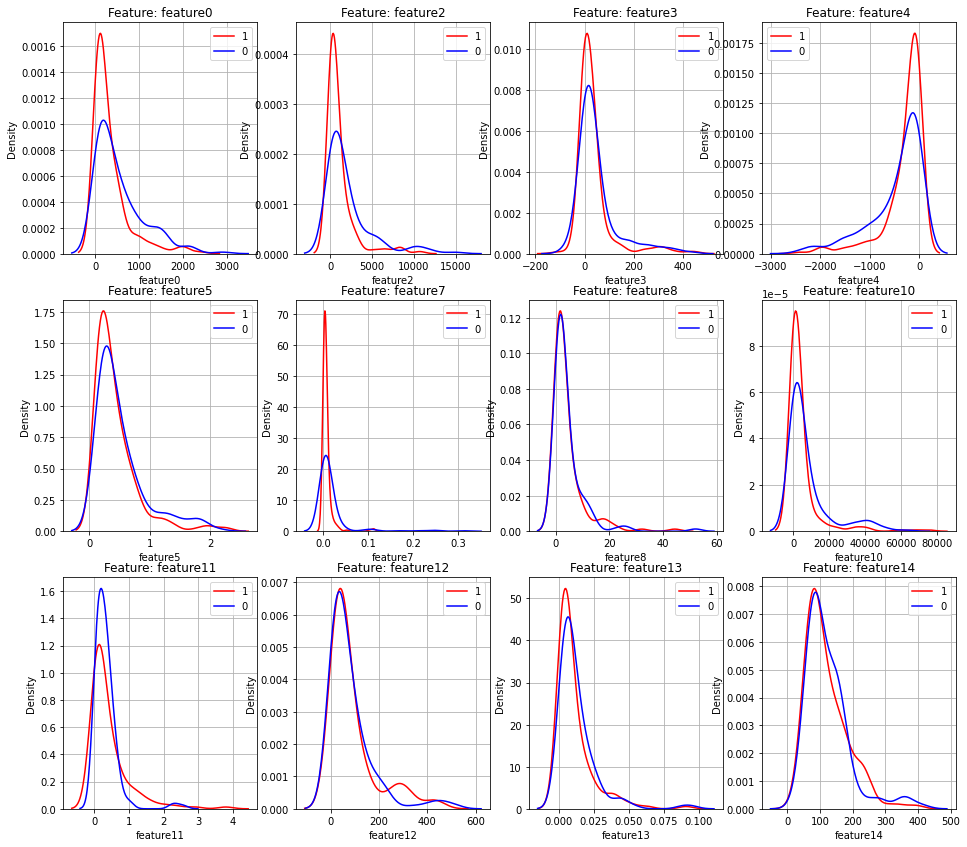

In [19]:
def kde_plot_no_outliers(dados, feature):

    
    dados2 = dados[(dados[feature]<dados[feature].quantile(0.99)) & (dados[feature]>dados[feature].quantile(0.01))]
     
    sns.kdeplot(dados2[feature][dados2['target']==1], label='1', color='red')
    
    sns.kdeplot(dados2[feature][dados2['target']==0], label='0', color='blue')
    
    plt.xlabel(feature)
    
    plt.ylabel('Density')
    
    plt.title(f'Feature: {feature}')
    
    plt.legend()
    
    plt.grid()

fig = plt.figure(figsize=(16,40))

i=0
for coluna in float_columns:
    plt.subplot(8,4,i+1)
    kde_plot_no_outliers(dados, coluna) 
    i=i+1

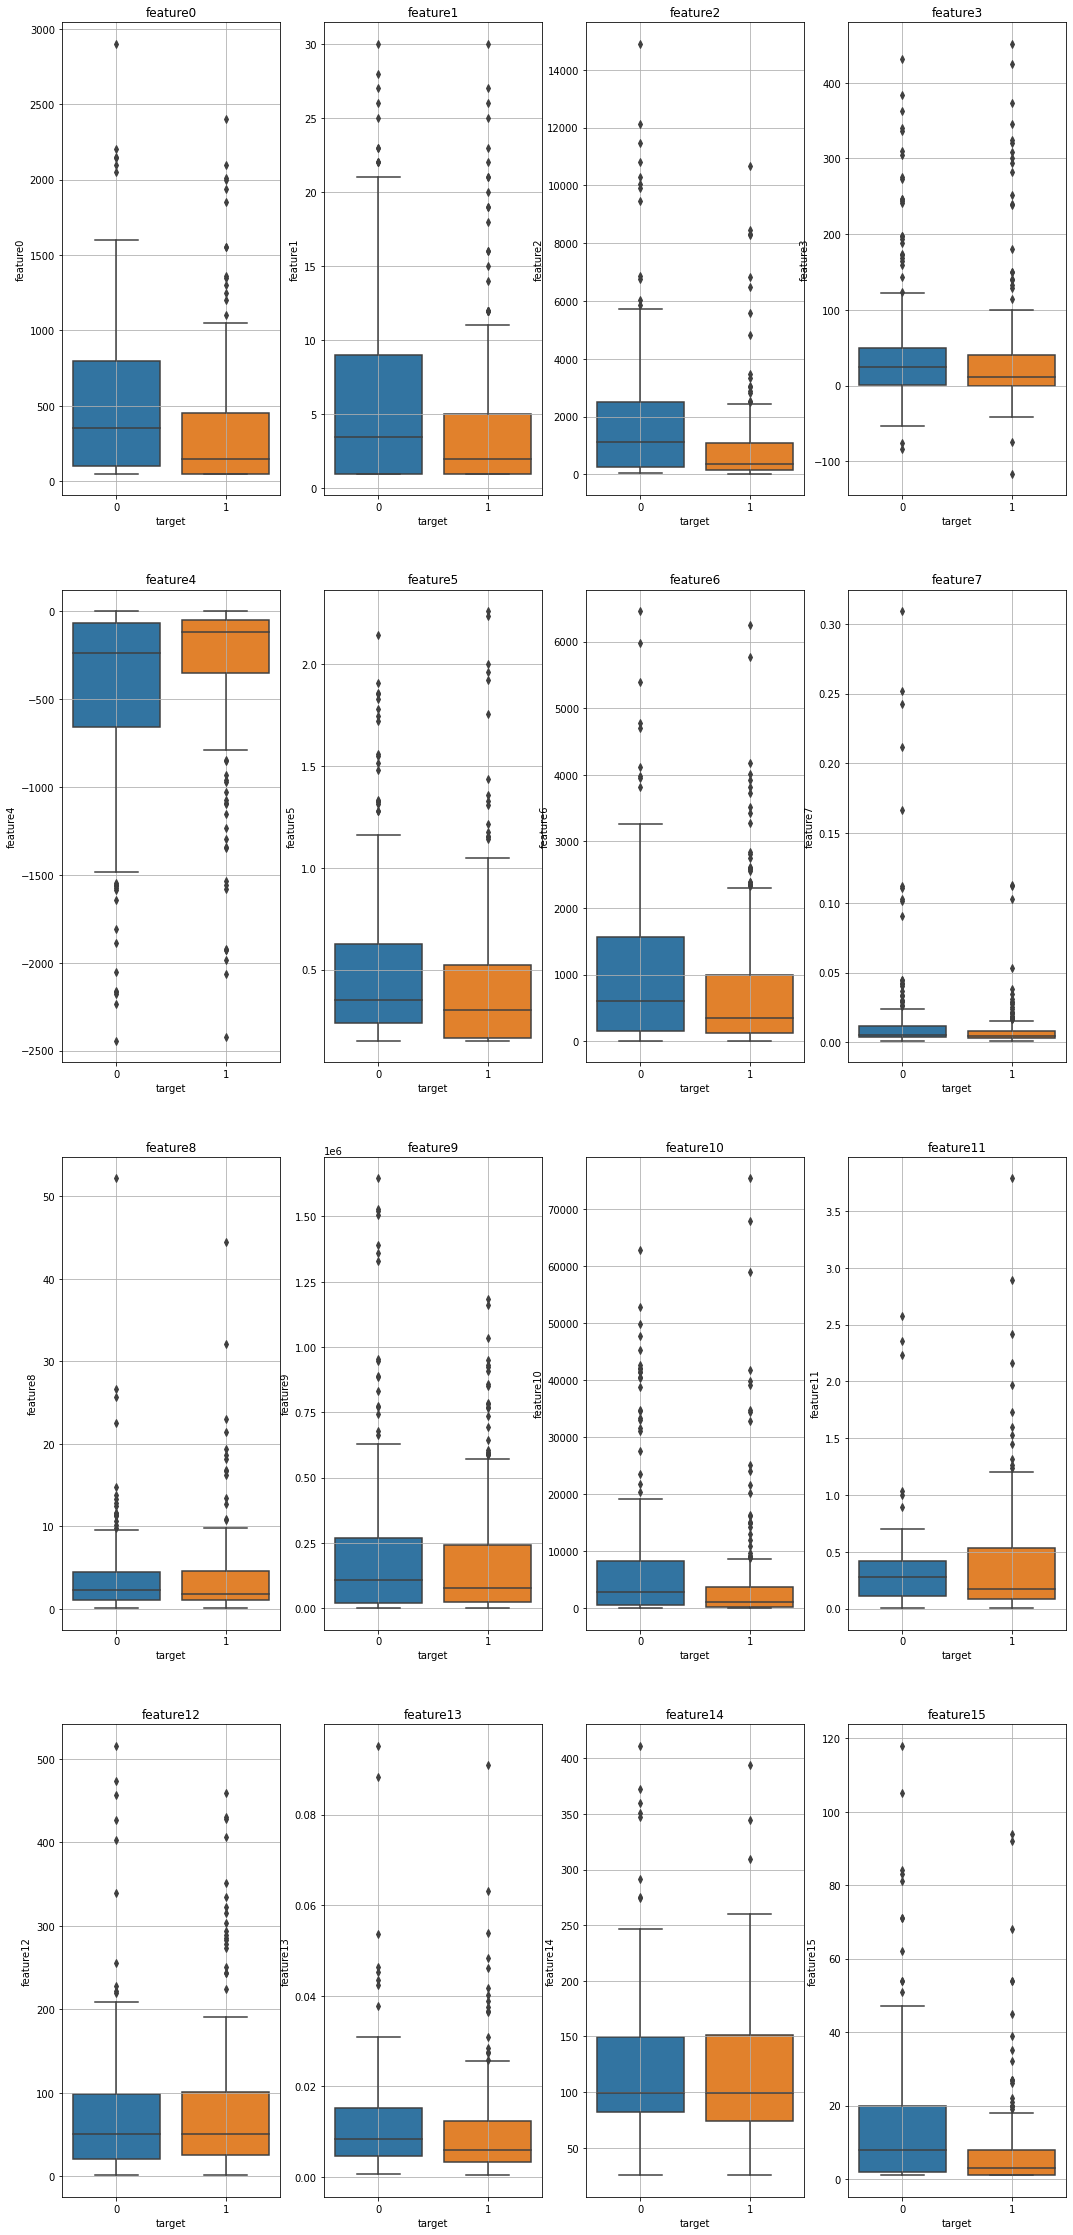

In [20]:
def box_plot_por_target_no_outliers(dados, feature):


    dados2 = dados[(dados[feature]<dados[feature].quantile(0.99)) & (dados[feature]>dados[feature].quantile(0.01))]

    sns.boxplot(x='target',y=feature,data=dados2)

    plt.title(feature)
    
    plt.grid()
    
fig = plt.figure(figsize=(18,40))

for i in range(0,len(dados.columns)-1):
    
    plt.subplot(4,4,i+1)

    box_plot_por_target_no_outliers(dados, dados.columns[i])

In [21]:
def clamp_outliers(df_input):

    df_out = df_input.copy()

    colunas = []

    linf = []

    lsup = []

    for col_name in df_out.columns.to_list()[:-1]:

        colunas.append(col_name)

        q1 = df_out[col_name].quantile(0.25)

        q3 = df_out[col_name].quantile(0.75)
        
        iqr = q3-q1 # amplitude interquartil
        
        low  = q1-3*iqr

        linf.append(low)
        
        high = q3+3*iqr

        lsup.append(high)
        
        df_out[col_name][df_out[col_name] > high] = high

        df_out[col_name][df_out[col_name] < low] = low

    data = pd.DataFrame(columns=colunas, data=[linf, lsup], index=['limite_inferior', 'limite_superior'])

    data.to_csv('outliers_limites.csv')

    return df_out


dados_clamped = clamp_outliers(dados)


### **2.4. Correlação**

Vamos observar como os dados estão correlacionados. Como visto na etapa anterior, os outliers foram ceifados, visando minimizar o impacto no cálculo do coeficiente pearson da correlação.

In [22]:
matriz_correlacao = dados_clamped.corr()

matriz_correlacao

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
feature0,1.000000,0.825124,0.718031,0.104499,-0.974750,0.261114,0.798558,-0.235111,0.102569,0.798405,0.548070,0.270476,0.326492,0.211044,0.414935,0.685779,-0.212064
feature1,0.825124,1.000000,0.610655,-0.163614,-0.829335,0.205735,0.729812,-0.228195,0.075651,0.712926,0.451136,0.232944,0.318462,0.173688,0.370431,0.604967,-0.174614
feature2,0.718031,0.610655,1.000000,0.099800,-0.722325,0.021320,0.714010,-0.028711,0.569162,0.554566,0.666799,0.377044,0.022605,0.562747,0.530477,0.919730,-0.228897
feature3,0.104499,-0.163614,0.099800,1.000000,-0.020913,-0.127334,0.076100,0.110182,0.101246,0.001356,0.111239,0.011503,-0.142107,0.082430,-0.002185,0.091827,-0.081357
feature4,-0.974750,-0.829335,-0.722325,-0.020913,1.000000,-0.263441,-0.821736,0.250593,-0.098753,-0.826321,-0.538786,-0.291998,-0.361665,-0.205182,-0.430695,-0.691424,0.199990
feature5,0.261114,0.205735,0.021320,-0.127334,-0.263441,1.000000,-0.085588,-0.349328,-0.192896,0.051132,0.144694,-0.095828,0.220906,0.005630,0.070646,-0.020735,-0.130423
feature6,0.798558,0.729812,0.714010,0.076100,-0.821736,-0.085588,1.000000,-0.144754,0.187742,0.839000,0.446219,0.388514,0.253228,0.177282,0.360548,0.741146,-0.152714
feature7,-0.235111,-0.228195,-0.028711,0.110182,0.250593,-0.349328,-0.144754,1.000000,0.252716,-0.356815,-0.065300,-0.056180,-0.244291,0.186968,-0.079966,-0.023507,-0.172442
feature8,0.102569,0.075651,0.569162,0.101246,-0.098753,-0.192896,0.187742,0.252716,1.000000,0.030116,0.373999,0.340162,-0.161712,0.845617,0.484724,0.528232,-0.090359
feature9,0.798405,0.712926,0.554566,0.001356,-0.826321,0.051132,0.839000,-0.356815,0.030116,1.000000,0.358361,0.321568,0.413509,0.063850,0.371110,0.542602,-0.071077


<AxesSubplot:>

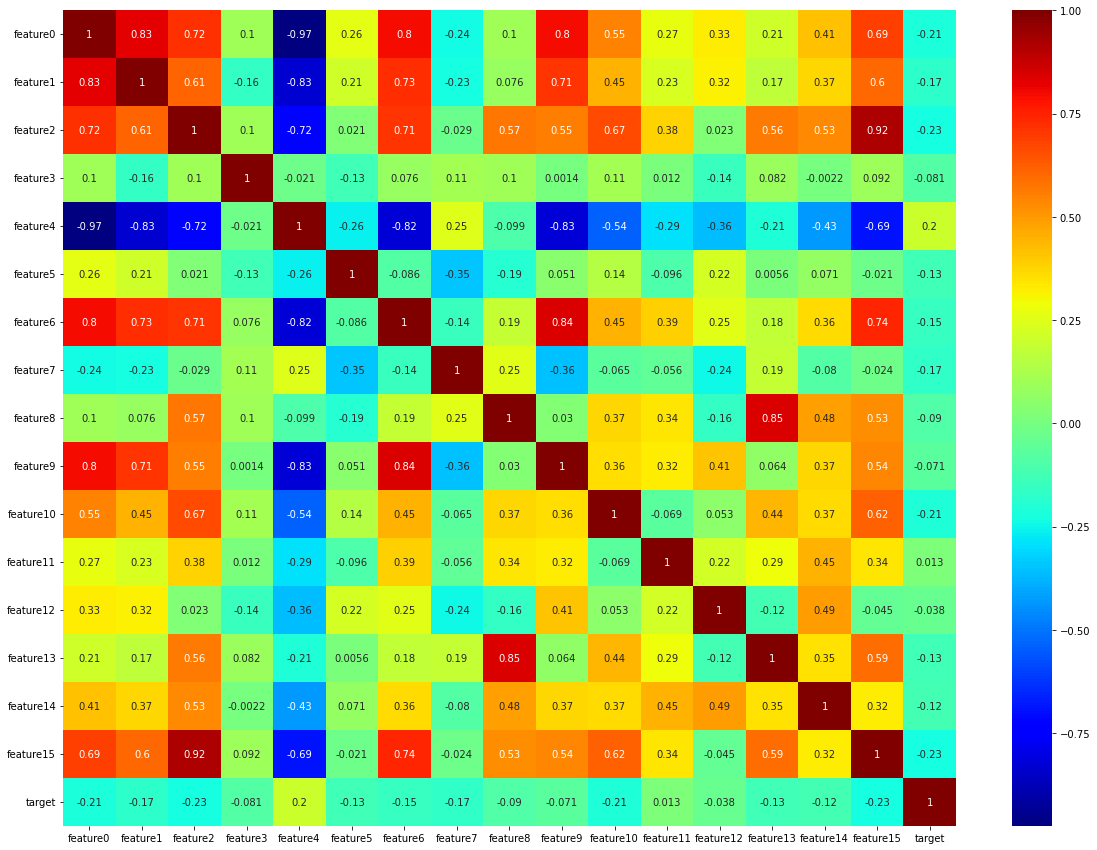

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(matriz_correlacao, annot=True, cmap='jet')

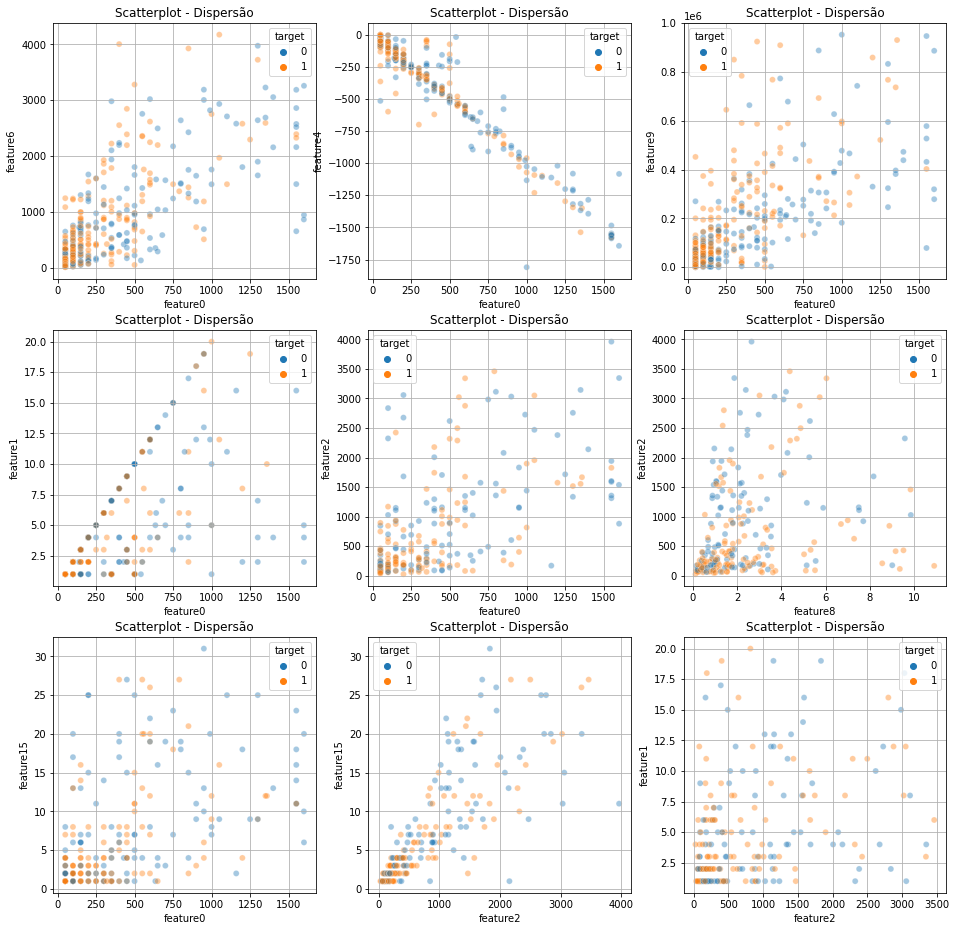

In [24]:
plt.figure(figsize=(16,16))

plt.subplot(3,3,1)
scatter2(dados_clamped, 'feature0', 'feature6')

plt.subplot(3,3,2)
scatter2(dados_clamped, 'feature0', 'feature4')

plt.subplot(3,3,3)
scatter2(dados_clamped, 'feature0', 'feature9')

plt.subplot(3,3,4)
scatter2(dados_clamped, 'feature0', 'feature1')

plt.subplot(3,3,5)
scatter2(dados_clamped, 'feature0', 'feature2')

plt.subplot(3,3,6)
scatter2(dados_clamped, 'feature8', 'feature2')

plt.subplot(3,3,7)
scatter2(dados_clamped, 'feature0', 'feature15')

plt.subplot(3,3,8)
scatter2(dados_clamped, 'feature2', 'feature15')

plt.subplot(3,3,9)
scatter2(dados_clamped, 'feature2', 'feature1')

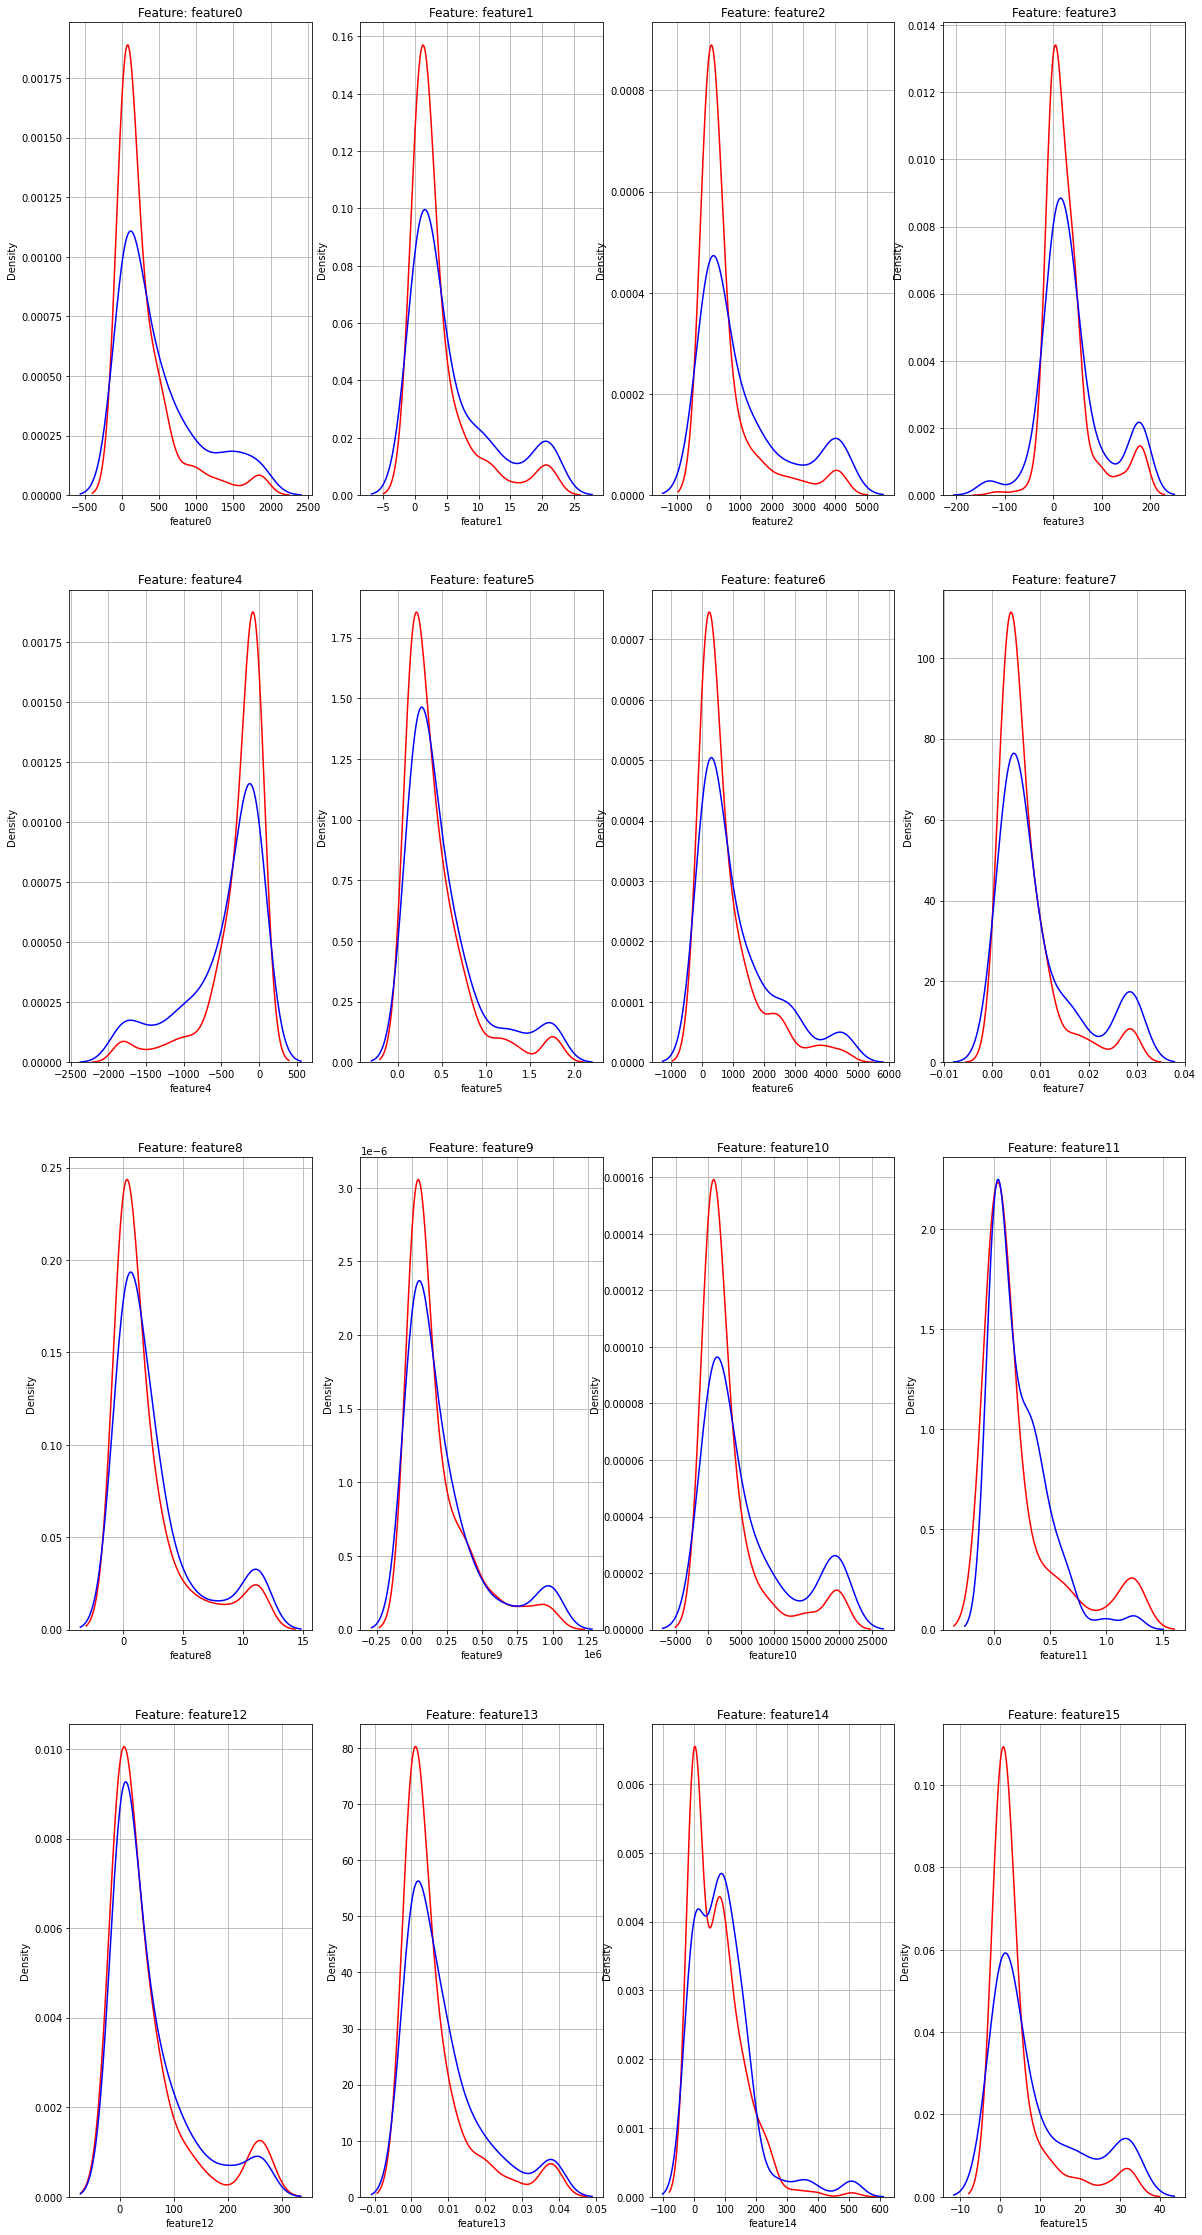

In [25]:
plt.figure(figsize=(20,40))

i=0
for coluna in dados.columns[:-1]:
    plt.subplot(4,4,i+1)
    kde_plot(dados_clamped, coluna) 
    i=i+1

**Vamos aplicar a transformação Yeo-Johnson para tentar minimizar a assimetria da distribuição dos dados**

In [26]:
from sklearn.preprocessing import PowerTransformer

PT = PowerTransformer(method='yeo-johnson')

dados_clamped_normal = dados_clamped.copy()

dados_clamped_normal.iloc[:,:-1] = PT.fit_transform(dados_clamped.iloc[:,:-1]) 


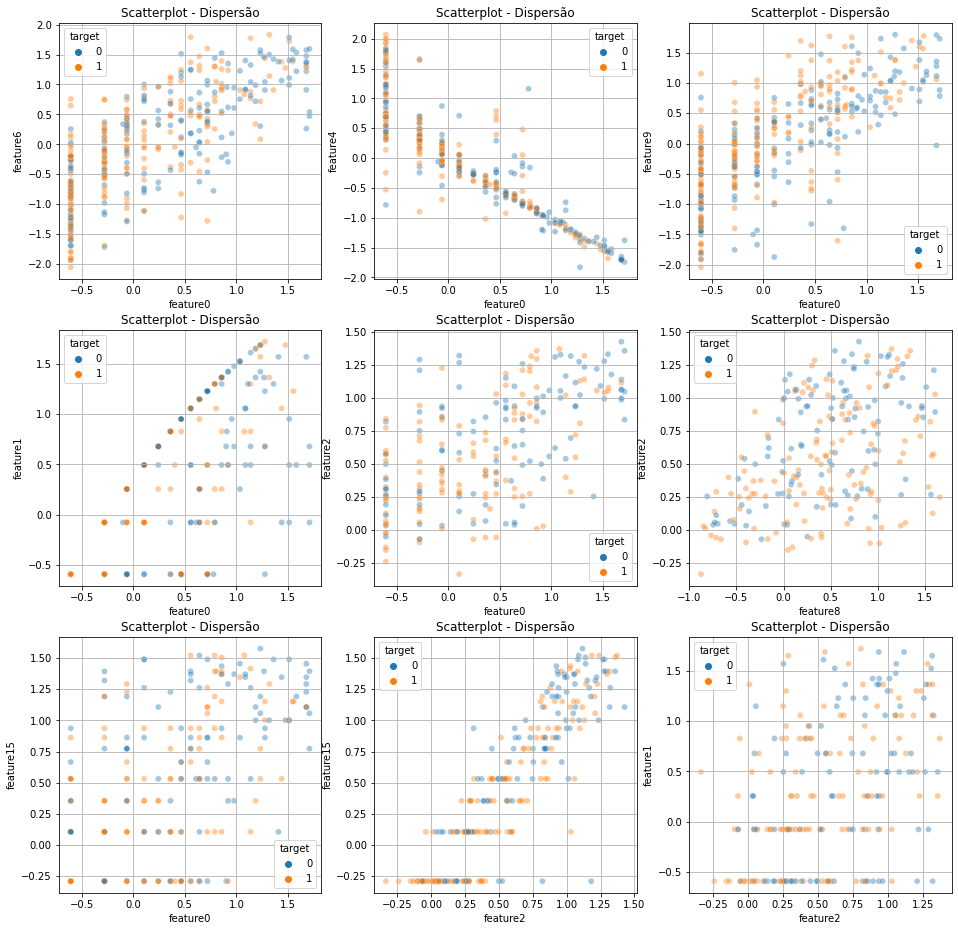

In [27]:
plt.figure(figsize=(16,16))

plt.subplot(3,3,1)
scatter2(dados_clamped_normal, 'feature0', 'feature6')

plt.subplot(3,3,2)
scatter2(dados_clamped_normal, 'feature0', 'feature4')

plt.subplot(3,3,3)
scatter2(dados_clamped_normal, 'feature0', 'feature9')

plt.subplot(3,3,4)
scatter2(dados_clamped_normal, 'feature0', 'feature1')

plt.subplot(3,3,5)
scatter2(dados_clamped_normal, 'feature0', 'feature2')

plt.subplot(3,3,6)
scatter2(dados_clamped_normal, 'feature8', 'feature2')

plt.subplot(3,3,7)
scatter2(dados_clamped_normal, 'feature0', 'feature15')

plt.subplot(3,3,8)
scatter2(dados_clamped_normal, 'feature2', 'feature15')

plt.subplot(3,3,9)
scatter2(dados_clamped_normal, 'feature2', 'feature1')

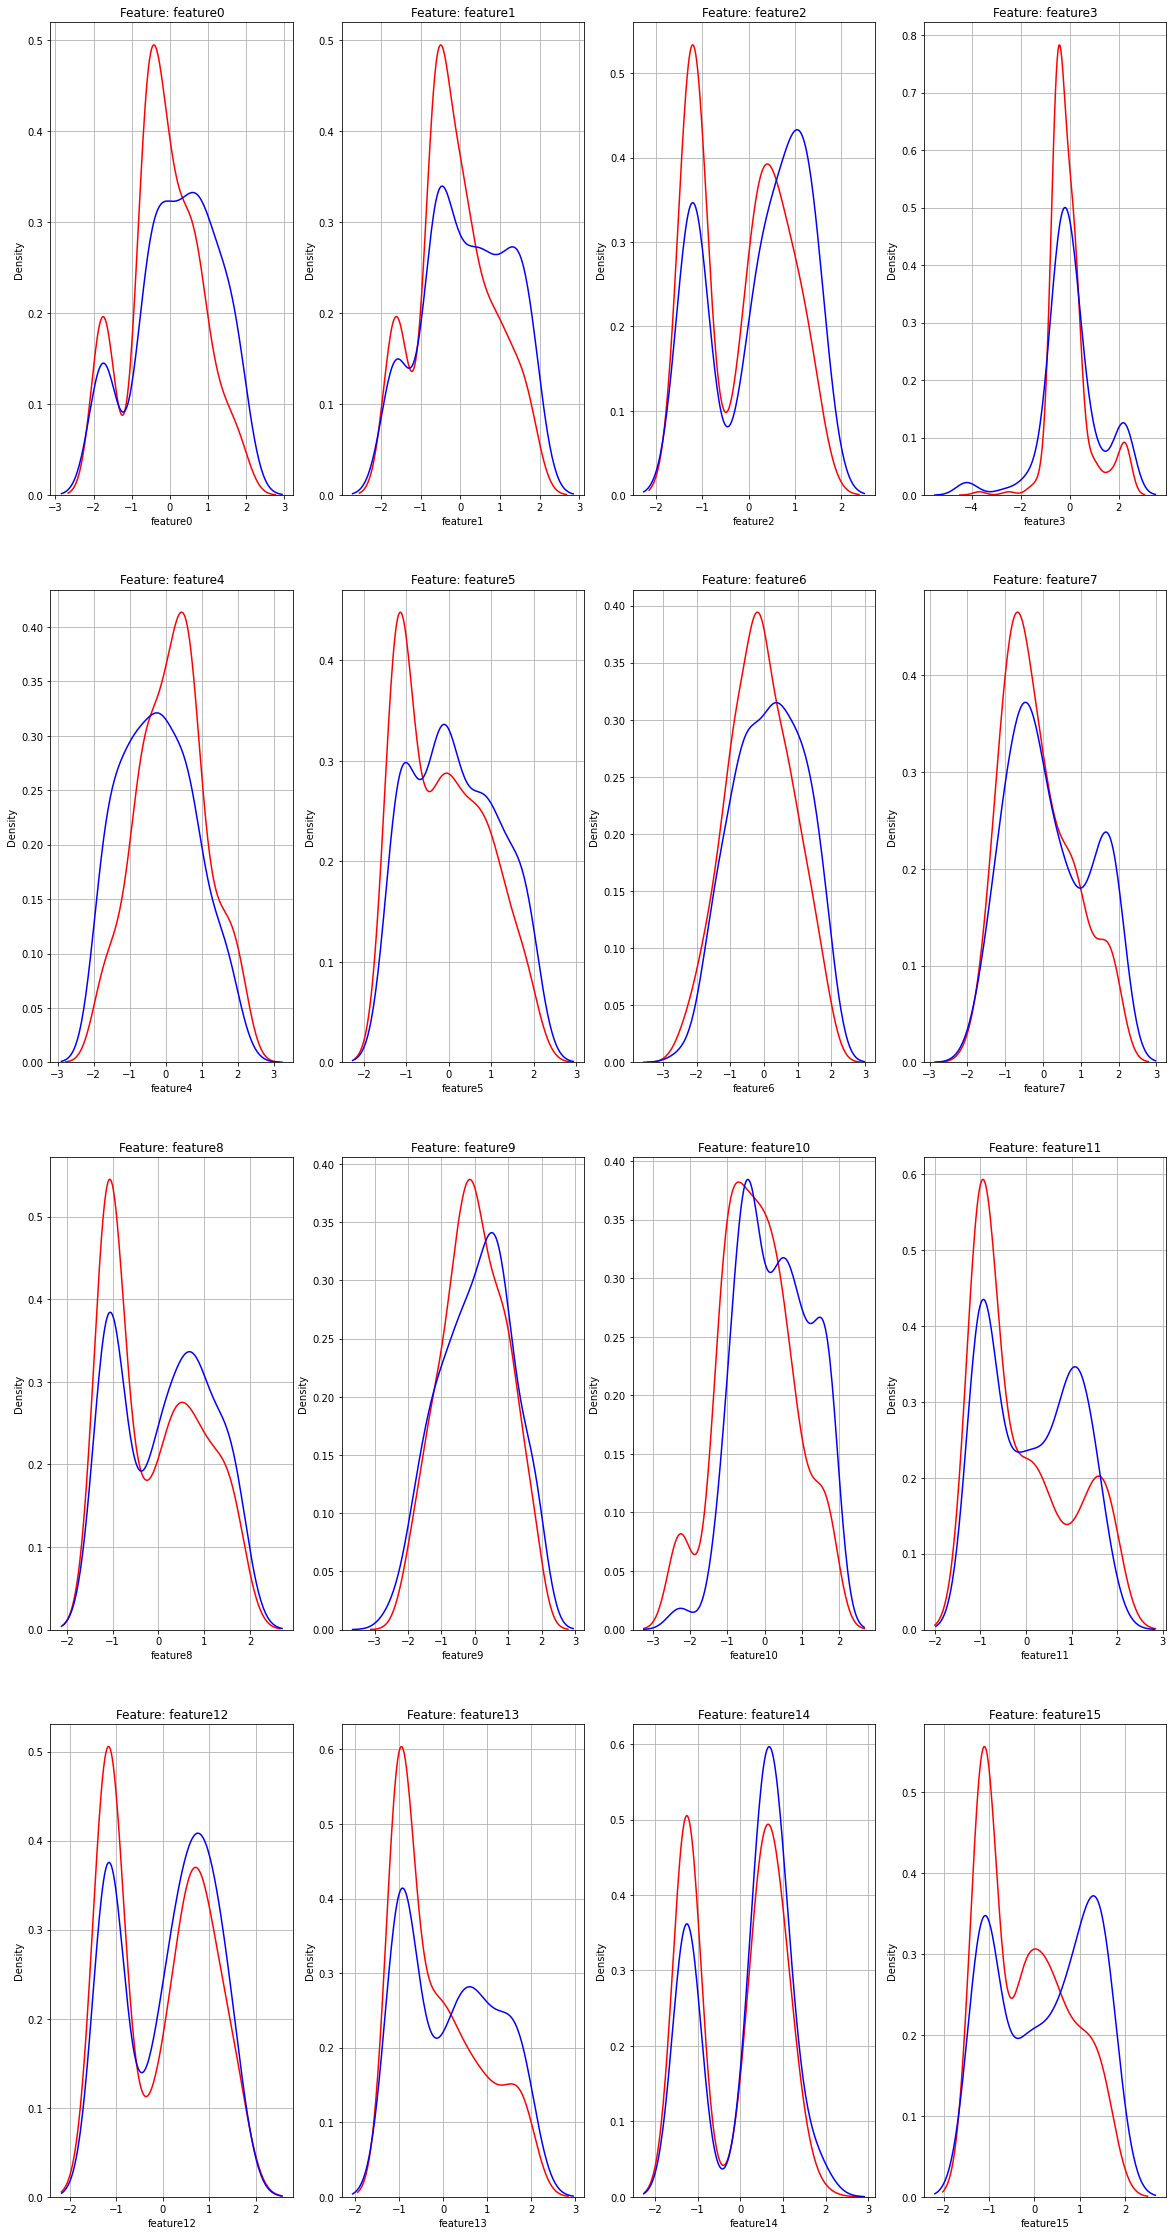

In [28]:
plt.figure(figsize=(20,40))

i=0
for coluna in dados.columns[:-1]:
    plt.subplot(4,4,i+1)
    kde_plot(dados_clamped_normal, coluna) 
    i=i+1

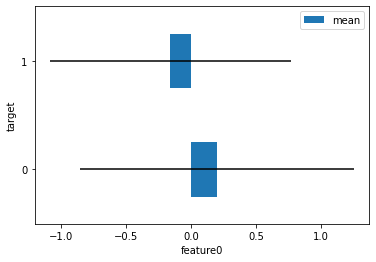

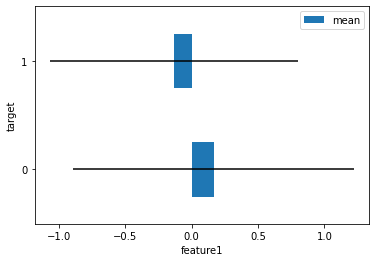

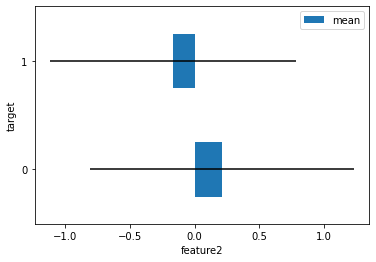

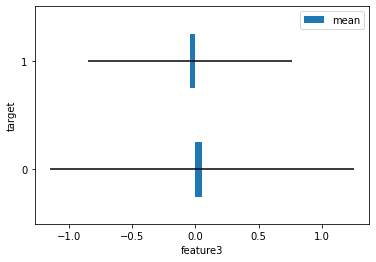

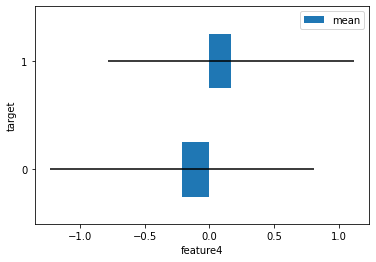

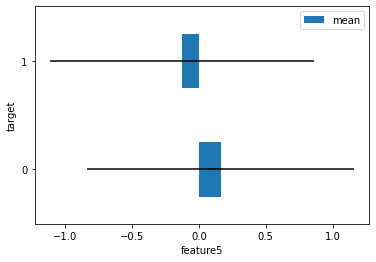

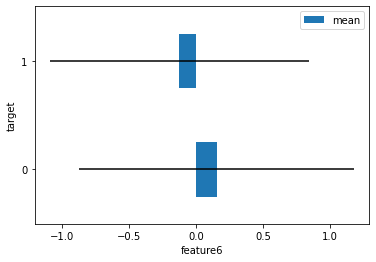

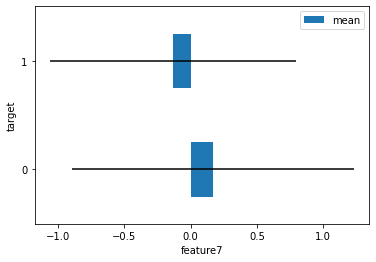

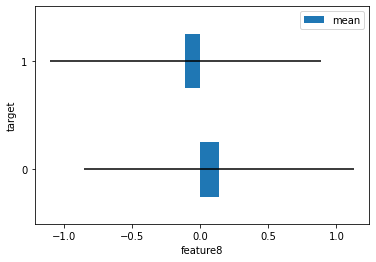

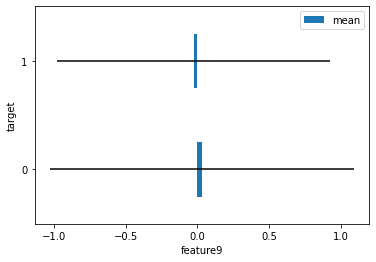

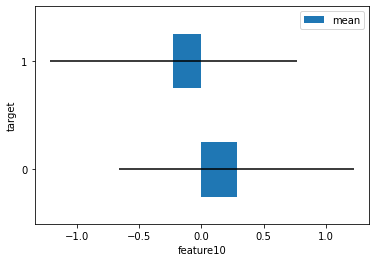

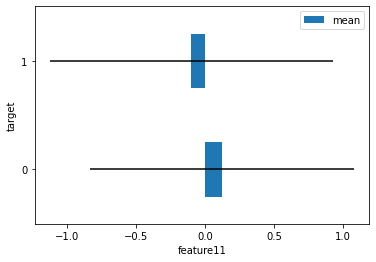

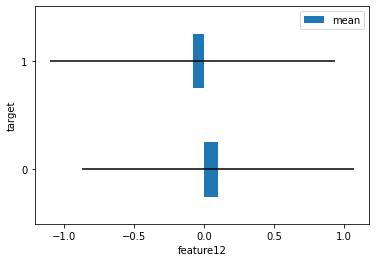

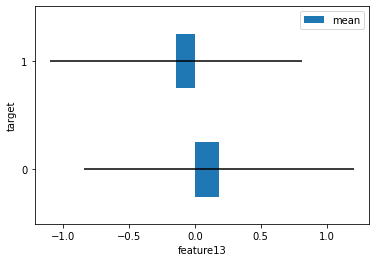

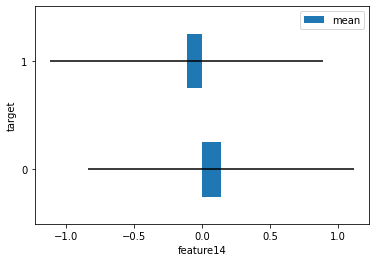

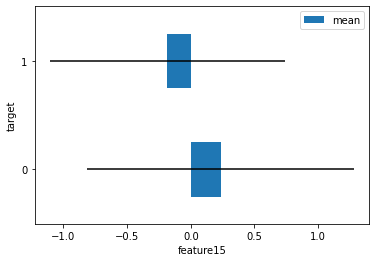

In [29]:
def barplot(data, feature):
    
    a = data.groupby('target')[feature].agg(['mean','std']).copy()
    
    a.plot(kind="barh", y="mean", xerr="std")
    
    plt.xlabel(feature)


for feature in dados_clamped_normal.columns[:-1]:
   
    barplot(dados_clamped_normal,feature)
    


- **Na maioria das features, as distribuições das classes 0 (azul) e 1 (vermelha) aparentam ser bem semelhantes, o que pode indicar uma dificuldade de obter bons resultados futuramente, na predição.**

- **Quando realizada uma comparação entre as médias e desvios padrão das features para cada classe da target, observa-se uma sobreposição da faixa do desvio-padrão, o que confirma o que foi dito anteriormente, sobre as distribuições de cada target serem muito semelhantes**

### Conclusões

- Há a presença de outliers, logo, irei tratar pela técnica de clamp em Q1-3IQR e Q3+3IQR;

- Evitarei excluí-los pois possuímos poucos dados. Além disso, pela análise, algumas features apresentam informação nos outliers que pode ser relevante para o modelo;

- Distribuições assimétricas, irei aplicar transformação Yeo-Jhonson;

- Tratei as variáveis discretas/inteiras como quantitativas, não qualitativas;

- Irei excluir a “feature4” pois apresenta uma forte correlação com a “feature0”;

- Distribuições para as diferentes classes (0 e 1) são muito parecidas, e embora a média das features tenha uma pequena diferença, os desvios padrão acabam se sobrepondo;
